In [73]:
import geopandas as gpd

In [2]:
print(geopandas.__path__)

['/opt/anaconda3/envs/tf/lib/python3.7/site-packages/geopandas']


In [4]:
geopandas.__version__

'0.9.0'

In [7]:
import geoplot as gplt

In [8]:
world = geopandas.read_file(
    geopandas.datasets.get_path('naturalearth_lowres')
)
boroughs = geopandas.read_file(
    geoplot.datasets.get_path('nyc_boroughs')
)
collisions = geopandas.read_file(
    geoplot.datasets.get_path('nyc_injurious_collisions')
)

<AxesSubplot:>

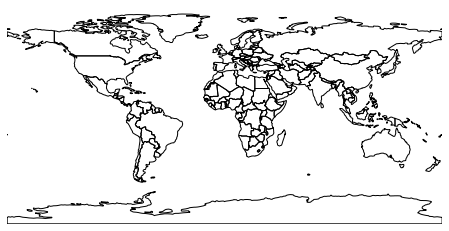

In [9]:
geoplot.polyplot(world, figsize=(8, 4))

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/geoplot/geoplot.py:712: UserWarning: Plot extent lies outside of the Orthographic projection's viewport. Defaulting to global extent.
  'Plot extent lies outside of the Orthographic projection\'s '
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The outline_patch property is deprecated. Use GeoAxes.spines['geo'] or the default Axes properties instead.
  """


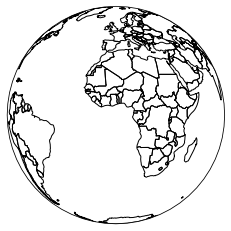

In [10]:
# use the Orthographic map projection (e.g. a world globe)
ax = geoplot.polyplot(
    world, projection=geoplot.crs.Orthographic(), figsize=(8, 4)
)
ax.outline_patch.set_visible(True)

<AxesSubplot:>

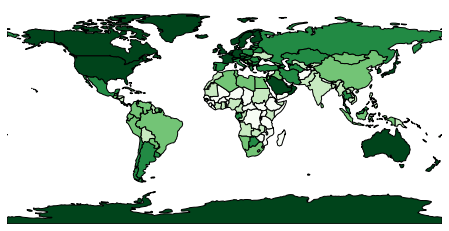

In [11]:
import mapclassify
gpd_per_person = world['gdp_md_est'] / world['pop_est']
scheme = mapclassify.Quantiles(gpd_per_person, k=5)

# Note: this code sample requires geoplot>=0.4.0.
geoplot.choropleth(
    world, hue=gpd_per_person, scheme=scheme,
    cmap='Greens', figsize=(8, 4)
)

<AxesSubplot:>

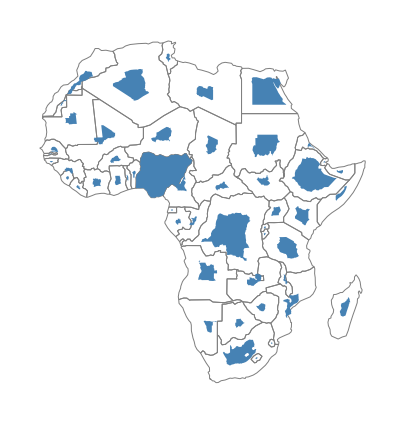

In [12]:
africa = world.query('continent == "Africa"')
ax = geoplot.cartogram(
    africa, scale='pop_est', limits=(0.2, 1),
    edgecolor='None', figsize=(7, 8)
)
geoplot.polyplot(africa, edgecolor='gray', ax=ax)

/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

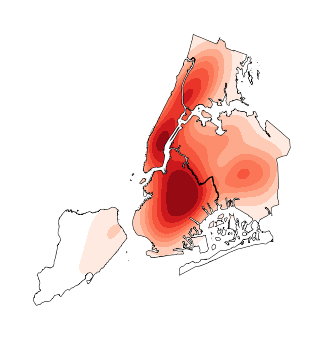

In [13]:
ax = geoplot.kdeplot(
    collisions.head(1000), clip=boroughs.geometry,
    shade=True, cmap='Reds',
    projection=geoplot.crs.AlbersEqualArea())
geoplot.polyplot(boroughs, ax=ax, zorder=1)

In [21]:
import libpysal

In [22]:
_ = libpysal.examples.load_example('South')
pth = libpysal.examples.get_path('south.shp')

Example not available: South
Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


In [18]:
pysal.__version__

'1.14.4'

In [19]:
mapclassify.__version__

'2.4.3'

In [23]:
a = libpysal.examples.load_example('South')

In [24]:
pth = libpysal.examples.get_path('south.shp')

In [26]:
from geopandas import read_file
df = read_file(pth)

In [45]:
display(df)

,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,STFIPS,COFIPS,FIPSNO,SOUTH,HR60,...,BLK90,GI59,GI69,GI79,GI89,FH60,FH70,FH80,FH90,geometry
0,Hancock,West Virginia,54,029,54029,54,29,54029,1,1.682864,...,2.557262,0.223645,0.295377,0.332251,0.363934,9.981297,7.800000,9.785797,12.604552,"POLYGON ((-80.62805 40.39816, -80.60204 40.480..."
1,Brooke,West Virginia,54,009,54009,54,9,54009,1,4.607233,...,0.748370,0.220407,0.318453,0.314165,0.350569,10.929337,8.000000,10.214990,11.242293,"POLYGON ((-80.52625 40.16245, -80.58760 40.175..."
2,Ohio,West Virginia,54,069,54069,54,69,54069,1,0.974132,...,3.310334,0.272398,0.358454,0.376963,0.390534,15.621643,12.900000,14.716681,17.574021,"POLYGON ((-80.52517 40.02275, -80.73843 40.035..."
3,Marshall,West Virginia,54,051,54051,54,51,54051,1,0.876248,...,0.546097,0.227647,0.319580,0.320953,0.377346,11.962834,8.800000,8.803253,13.564159,"POLYGON ((-80.52447 39.72113, -80.83248 39.718..."
4,New Castle,Delaware,10,003,10003,10,3,10003,1,4.228385,...,16.480294,0.256106,0.329678,0.365830,0.332703,12.035714,10.700000,15.169480,16.380903,"POLYGON ((-75.77270 39.38301, -75.79144 39.723..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1407,Halifax,Virginia,51,083,51083,51,83,51083,1,18.513376,...,38.751041,0.364231,0.393521,0.368059,0.371885,15.285003,12.642743,15.191856,17.064510,"POLYGON ((-79.14433 36.54606, -79.21706 36.549..."
1408,Rockbridge,Virginia,51,163,51163,51,163,51163,1,4.159907,...,5.472362,0.312941,0.360766,0.355868,0.372557,14.075977,9.407719,11.121569,12.111944,"POLYGON ((-79.43775 37.61596, -79.45834 37.603..."
1409,Roanoke,Virginia,51,161,51161,51,161,51161,1,5.403098,...,2.993559,0.250404,0.316042,0.333835,0.324549,8.288560,6.899449,11.326885,11.866653,"POLYGON ((-80.12475 37.12510, -80.14045 37.128..."
1410,York,Virginia,51,199,51199,51,199,51199,1,1.544425,...,12.534861,0.271201,0.279962,0.310047,0.326229,8.776244,6.300000,8.063281,9.825284,"POLYGON ((-76.39569 37.10771, -76.40270 37.090..."


In [27]:
%matplotlib inline

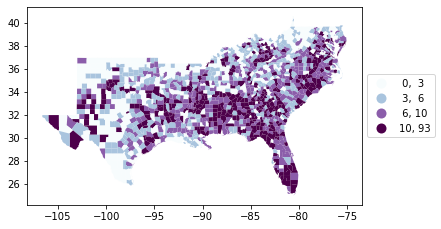

In [123]:
ax = df.plot(column='HR60', scheme='QUANTILES', k=4, \
             cmap='BuPu', legend=True,
             legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:.0f}"})


In [29]:
labels = [t.get_text() for t in ax.get_legend().get_texts()]
labels

[' 0.00,  3.21', ' 3.21,  6.25', ' 6.25,  9.96', ' 9.96, 92.94']

In [41]:
q4 = mapclassify.Quantiles(df.HR60, k=4)
q4

Quantiles             

   Interval      Count
----------------------
[ 0.00,  3.21] |   353
( 3.21,  6.25] |   353
( 6.25,  9.96] |   353
( 9.96, 92.94] |   353

In [42]:
labels == q4.get_legend_classes()

False

In [48]:
from shapely.geometry import Point, polygon
import descartes
import matplotlib.pyplot as plt

In [65]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20210909.csv'
path = '../ITA_adm/ITA_adm2.shp'
dfit = read_file(path)

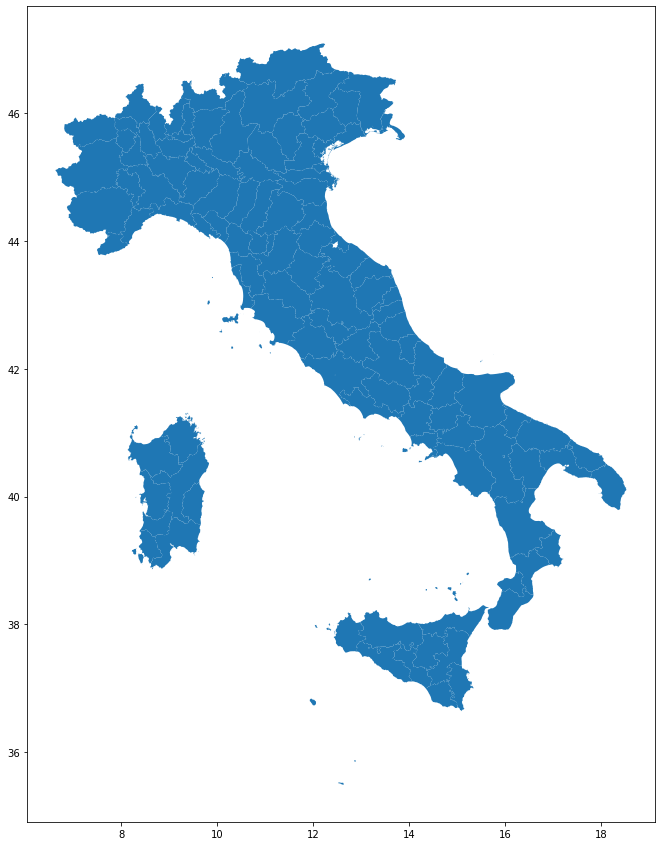

In [113]:
fig, ax = plt.subplots(figsize=(15,15))
dfit.plot(ax=ax)
plt.show()

In [68]:
import pandas as pd

In [69]:
dfDat = pd.read_csv(url)
crs = {'init':'epsg:4326'}
dfDat.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3
0,2021-09-09T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,20206,NaN,ITF,ITF1,ITF11
1,2021-09-09T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,19090,NaN,ITF,ITF1,ITF12
2,2021-09-09T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,19413,NaN,ITF,ITF1,ITF13
3,2021-09-09T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,20434,NaN,ITF,ITF1,ITF14
4,2021-09-09T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,654,NaN,ITF,ITF1,NaN


data                         0
stato                        0
codice_regione               0
denominazione_regione        0
codice_provincia             0
denominazione_provincia      0
sigla_provincia             43
lat                         42
long                        42
totale_casi                  0
note                       149
codice_nuts_1                0
codice_nuts_2                0
codice_nuts_3               42
geometry                     0
dtype: int64
149


<AxesSubplot:>

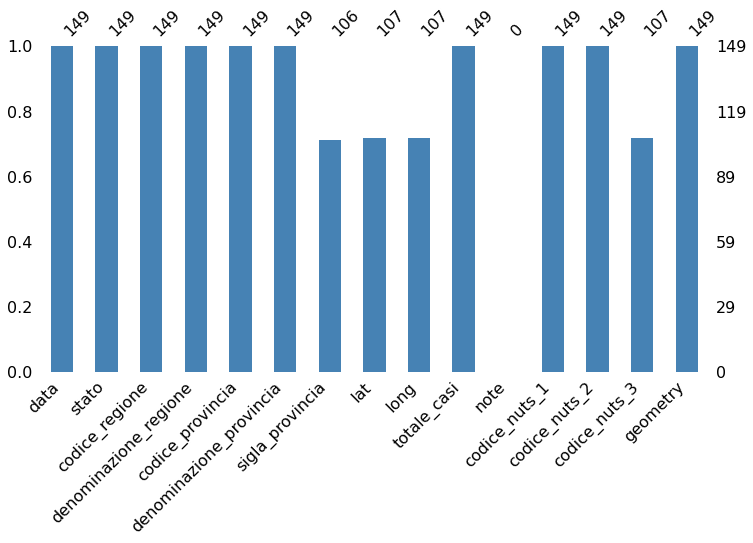

In [90]:
import missingno as msno
print(dfDat.isna().sum())
print(len(dfDat))

msno.bar(dfDat, figsize=(12,6), color='steelblue')

In [92]:
display(dfDat.loc[dfDat['lat'].isna()])

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,note,codice_nuts_1,codice_nuts_2,codice_nuts_3,geometry
4,2021-09-09T17:00:00,ITA,13,Abruzzo,879,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,654,NaN,ITF,ITF1,NaN,POINT (nan nan)
5,2021-09-09T17:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,NaN,NaN,119,NaN,ITF,ITF1,NaN,POINT (nan nan)
8,2021-09-09T17:00:00,ITA,17,Basilicata,880,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,803,NaN,ITF,ITF5,NaN,POINT (nan nan)
9,2021-09-09T17:00:00,ITA,17,Basilicata,980,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,ITF,ITF5,NaN,POINT (nan nan)
15,2021-09-09T17:00:00,ITA,18,Calabria,882,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,1104,NaN,ITF,ITF6,NaN,POINT (nan nan)
16,2021-09-09T17:00:00,ITA,18,Calabria,982,In fase di definizione/aggiornamento,NaN,NaN,NaN,0,NaN,ITF,ITF6,NaN,POINT (nan nan)
22,2021-09-09T17:00:00,ITA,15,Campania,883,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,911,NaN,ITF,ITF3,NaN,POINT (nan nan)
23,2021-09-09T17:00:00,ITA,15,Campania,983,In fase di definizione/aggiornamento,NaN,NaN,NaN,7293,NaN,ITF,ITF3,NaN,POINT (nan nan)
33,2021-09-09T17:00:00,ITA,8,Emilia-Romagna,884,Fuori Regione / Provincia Autonoma,NaN,NaN,NaN,4127,NaN,ITH,ITH5,NaN,POINT (nan nan)
34,2021-09-09T17:00:00,ITA,8,Emilia-Romagna,984,In fase di definizione/aggiornamento,NaN,NaN,NaN,1439,NaN,ITH,ITH5,NaN,POINT (nan nan)


In [81]:
dfDat['totale_casi'].describe()

count       149.000000
mean      30811.684564
std       45636.644473
min           0.000000
25%        4751.000000
50%       17652.000000
75%       32825.000000
max      281975.000000
Name: totale_casi, dtype: float64

In [101]:
dfDat = dfDat.drop(['note'],axis=1).dropna()

In [102]:
geometry = [Point(xy) for xy in zip(dfDat["long"],dfDat['lat'])]
geometry[:3]

In [109]:
geodf = gpd.GeoDataFrame(dfDat,crs=crs,geometry=geometry)
geodf.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,codice_nuts_1,codice_nuts_2,codice_nuts_3,geometry
0,2021-09-09T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,20206,ITF,ITF1,ITF11,POINT (13.39844 42.35122)
1,2021-09-09T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,19090,ITF,ITF1,ITF12,POINT (13.70440 42.65892)
2,2021-09-09T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,19413,ITF,ITF1,ITF13,POINT (14.21365 42.46458)
3,2021-09-09T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,20434,ITF,ITF1,ITF14,POINT (14.16755 42.35103)
6,2021-09-09T17:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,19041,ITF,ITF5,ITF51,POINT (15.80515 40.63947)


In [115]:
geodf.isna().sum()

data                       0
stato                      0
codice_regione             0
denominazione_regione      0
codice_provincia           0
denominazione_provincia    0
sigla_provincia            0
lat                        0
long                       0
totale_casi                0
codice_nuts_1              0
codice_nuts_2              0
codice_nuts_3              0
geometry                   0
dtype: int64

In [169]:
dati = pd.read_csv(url)
dati = dati.merge(dfit, left_on='denominazione_provincia', right_on='NAME_2')
dati.head()

,data,stato,codice_regione,denominazione_regione,codice_provincia,denominazione_provincia,sigla_provincia,lat,long,totale_casi,...,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,2021-09-09T17:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,20206,...,Italy,1,Abruzzo,2,L'Aquila,Provincia,Province,None,Aquila,"POLYGON ((13.40441 42.57731, 13.40542 42.57468..."
1,2021-09-09T17:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,19090,...,Italy,1,Abruzzo,4,Teramo,Provincia,Province,None,None,"POLYGON ((13.91542 42.89561, 13.91542 42.89542..."
2,2021-09-09T17:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,19413,...,Italy,1,Abruzzo,3,Pescara,Provincia,Province,None,None,"POLYGON ((14.07483 42.54282, 14.07576 42.54278..."
3,2021-09-09T17:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,20434,...,Italy,1,Abruzzo,1,Chieti,Provincia,Province,None,None,"POLYGON ((14.25403 42.44514, 14.25403 42.44486..."
4,2021-09-09T17:00:00,ITA,17,Basilicata,76,Potenza,PZ,40.639471,15.805148,19041,...,Italy,3,Basilicata,12,Potenza,Provincia,Province,None,None,"MULTIPOLYGON (((15.71736 39.96792, 15.71736 39..."


In [171]:
geodf = gpd.GeoDataFrame(dati)

<AxesSubplot:>

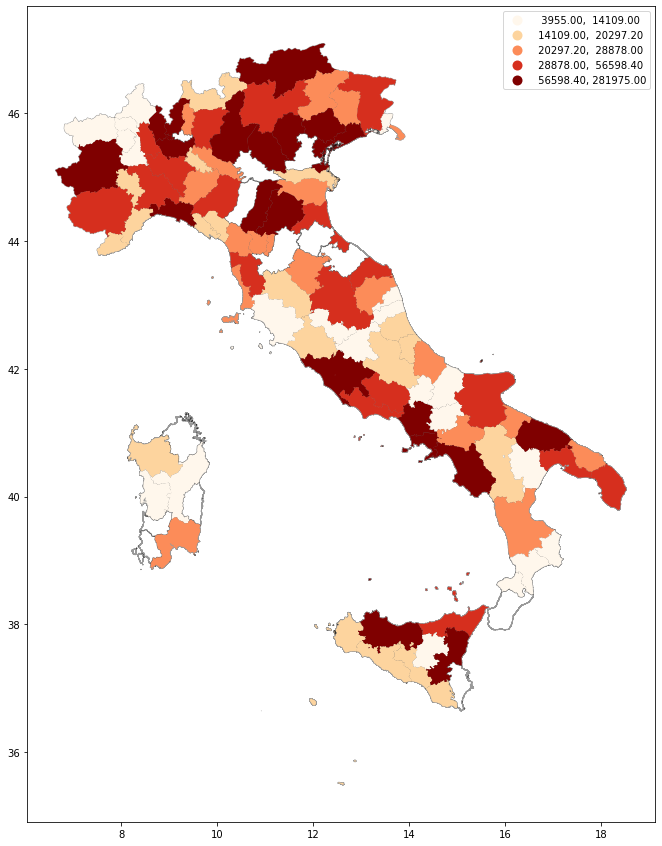

In [186]:
fig, ax = plt.subplots(figsize=(15,15))
dfit.plot(ax=ax, alpha=0.4, color="white", edgecolor="black")
geodf.plot(column='totale_casi', scheme="QUANTILES", ax=ax, legend=True,cmap='OrRd')

No handles with labels found to put in legend.


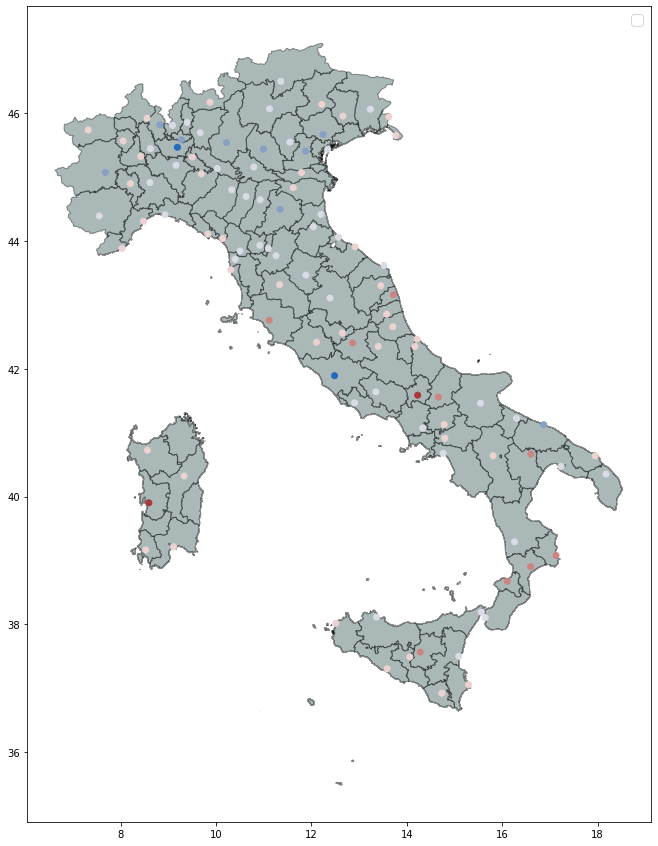

In [163]:
fig, ax = plt.subplots(figsize=(15,15))
dfit.plot(ax=ax, alpha=0.4, color="darkslategrey", edgecolor="black")
geodf.plot(column='totale_casi', scheme='percentiles', k=4, \
             cmap='vlag_r', legend=True, ax=ax,legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.5), 'fmt':"{:f}"} )
ax.legend(prop={'size':15})
plt.show()